6. Cdoes for extracting data from database   
We extracted and calculated two important features from our database, mean_air_quality, and state_energy_consumption. mean_air_quality is calculated by the average pm 2.5 measurements of each city of a state, and state_energy_consumption is calculated by energy consumption per capita of each state multiplying the population estimate of each state. Through state table, we joined necessary columns of our energy consumption per capita, population, and air quality tables.

In [1]:
import pprint
import csv
import pymysql
import numpy as np

In [2]:
import pprint
import matplotlib.pyplot as plt

connection = pymysql.connect(host="mariadb",
            user="root",  # mysql user
            passwd="",  # mysql passd
            db="my_project",
            autocommit=True,
            cursorclass=pymysql.cursors.DictCursor
            )

cursor = connection.cursor()

with connection.cursor() as cursor:
    # extract data and group by state
    
    sql = """SELECT stateTable.abbreviation AS state, AVG(airQuality.pm2point5) AS mean_air_quality, 
    (population.population * energyConsumption.energy_consumption) AS state_energy_consumption FROM population 
JOIN stateTable ON stateTable.name = population.state
JOIN energyConsumption ON energyConsumption.state_abbr = stateTable.abbreviation
JOIN airQuality ON stateTable.abbreviation = airQuality.state_abbr
GROUP BY airQuality.state_abbr"""
    
    cursor.execute(sql)
    results = cursor.fetchall()  # list of dicts
    results = list(results)
    
    print(sql)
    for row in results[:10]:
        pprint.pprint(row)

SELECT stateTable.abbreviation AS state, AVG(airQuality.pm2point5) AS mean_air_quality, 
    (population.population * energyConsumption.energy_consumption) AS state_energy_consumption FROM population 
JOIN stateTable ON stateTable.name = population.state
JOIN energyConsumption ON energyConsumption.state_abbr = stateTable.abbreviation
JOIN airQuality ON stateTable.abbreviation = airQuality.state_abbr
GROUP BY airQuality.state_abbr
{'mean_air_quality': 8.666666666666666,
 'state': 'AK',
 'state_energy_consumption': 600192246.0}
{'mean_air_quality': 7.050000054495675,
 'state': 'AL',
 'state_energy_consumption': 1935593400.0}
{'mean_air_quality': 6.799999952316284,
 'state': 'AR',
 'state_energy_consumption': 1057839792.0}
{'mean_air_quality': 3.859999990463257,
 'state': 'AZ',
 'state_energy_consumption': 1476318123.0}
{'mean_air_quality': 8.978787913466945,
 'state': 'CA',
 'state_energy_consumption': 7810753383.0}
{'mean_air_quality': 3.4750000635782876,
 'state': 'CO',
 'state_energy_

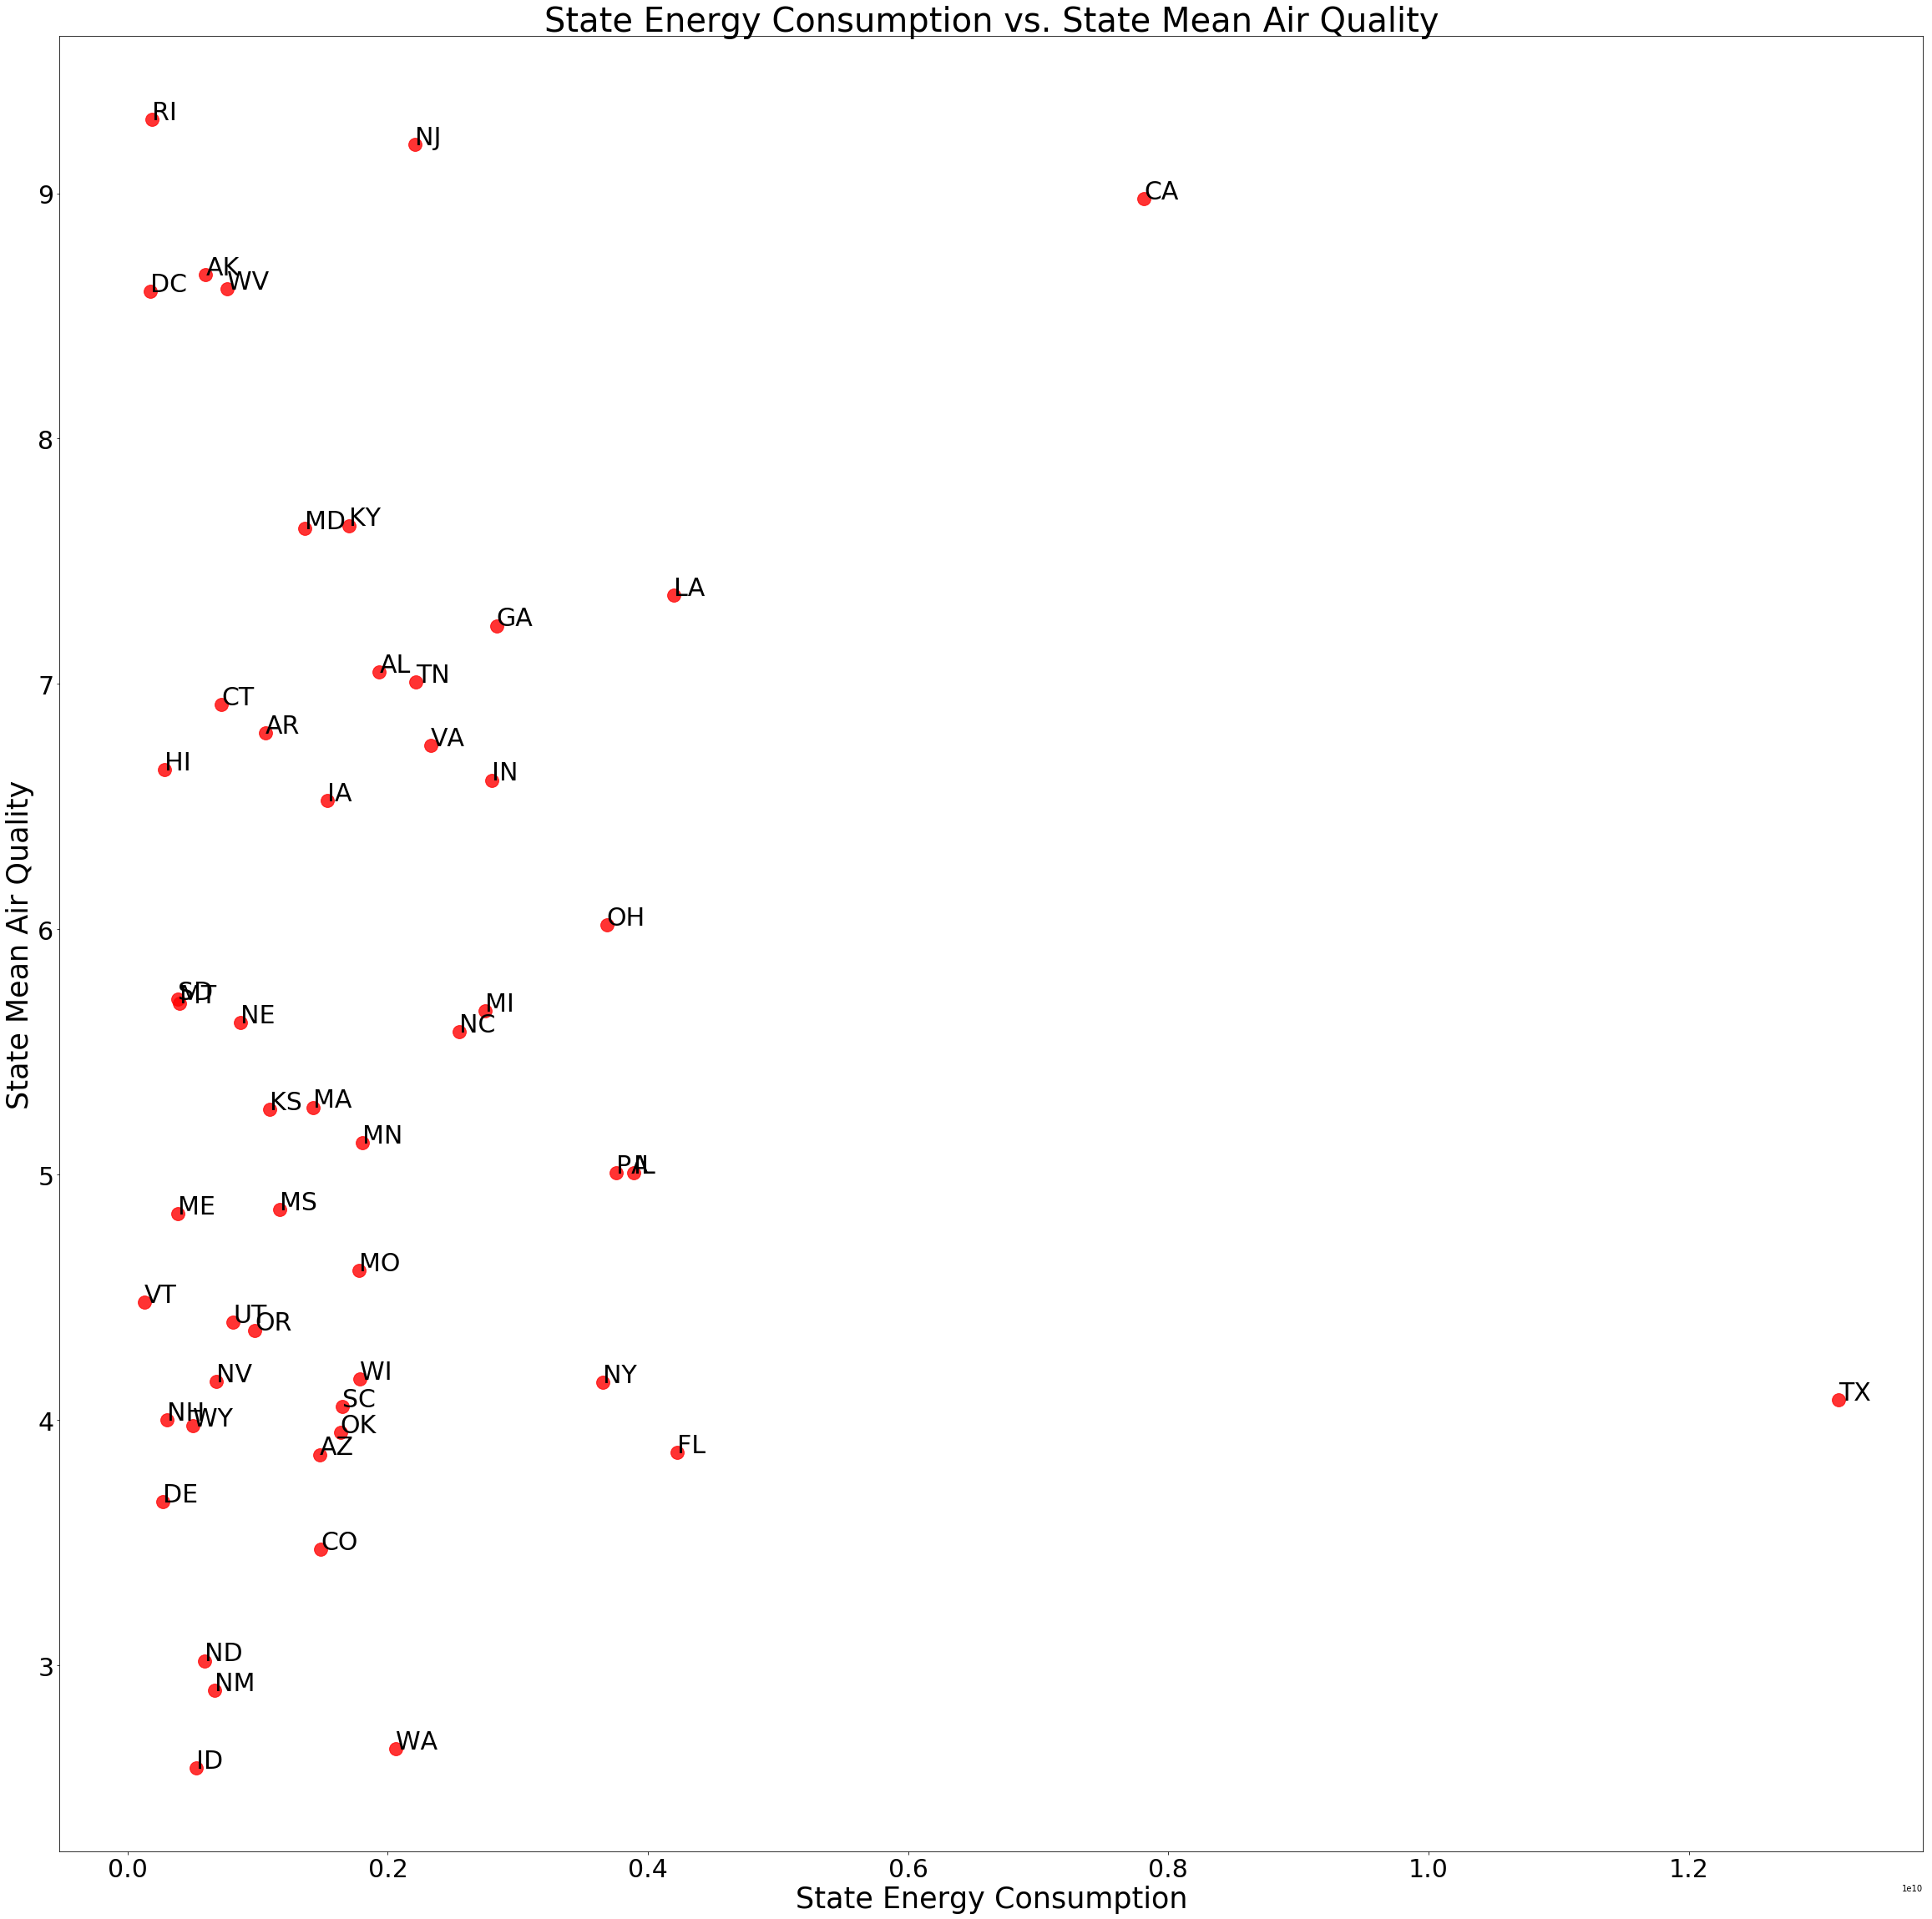

In [3]:
state_energy_consumption = []
mean_air_quality = []
state_name = []

for i in results:
    state_energy_consumption.append(i['state_energy_consumption'])
    mean_air_quality.append(i['mean_air_quality'])
    state_name.append(i['state'])

fig, ax = plt.subplots(figsize=(40, 40))
ax.scatter(state_energy_consumption, mean_air_quality, s=250, c='r', alpha=0.8)

for i, txt in enumerate(state_name):
    ax.annotate(txt, (state_energy_consumption[i], mean_air_quality[i]), fontsize = 30)

plt.title('State Energy Consumption vs. State Mean Air Quality', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('State Energy Consumption',fontsize=35)
plt.ylabel('State Mean Air Quality',fontsize=35)
plt.show()
fig.savefig('EnergyConsumption_AirQuality.png')

The figure above is a scatter plot of state energy consumption versus state mean air quality. It is plotted using Python matplotlib library with the features in the extracted data. It can be seen that TX seems to be an outlier that does not fit the increasing trend of other points. So, we decided to do two fits and see if there is a strong correlation between energy consumption and mean air quality, one with TX and one excluding TX. 

In [4]:
# export results data into csv file

column_names = ['state','mean_air_quality','state_energy_consumption']

with open('project_results.csv', 'w') as csvfile:
    myCsvWriter = csv.DictWriter(csvfile,
                                 delimiter=',',
                                 quotechar='"',
                                 fieldnames = column_names)

    myCsvWriter.writeheader() # uses contents of column_names

    # write the rows. We iterate through the list of dicts.
    for row in results:
        # every row must have all keys from column_names
        myCsvWriter.writerow(row)

print("Done writing csv")

Done writing csv
